In [1]:
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
from os.path import join as oj
import pandas as pd
import pickle as pkl
import sklearn.model_selection
import models
import util
import os
import config
import viz
import scipy.stats
from tqdm import tqdm
import figs
import matplotlib.image as mpimg
import seaborn as sns
import face_recognition
import dlib
from PIL import Image
from skimage import io
import scipy.misc
import matplotlib.pyplot as plt
import cv2

# crop and detect faces in real ims

In [18]:
def detect_faces(image):

    # Create a face detector
    face_detector = dlib.get_frontal_face_detector()

    # Run detector and get bounding boxes of the faces on image.
    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(),
                    x.right(), x.bottom()) for x in detected_faces]

    return face_frames

# Load image
def crop_and_resize_ims(dir_base='../data/pilot-our-images/',
                        dir_out_base='../data_processed/pilot-our-images-large',
                        MULT = 1.6):
    for folder in os.listdir(dir_base):
        dir_in = oj(dir_base, folder)
        dir_out = oj(dir_out_base, folder)
        os.makedirs(dir_out, exist_ok=True)

        im_num = 0
        for fname in sorted(os.listdir(dir_in)):
            if '.jpg' in fname:
                img_path = oj(dir_in, fname)
                image = io.imread(img_path)

                # Detect faces
                detected_faces = detect_faces(image)
                if len(detected_faces) > 0:

                    # Crop faces and plot
                    (left, upper, right, lower) = detected_faces[0]
                    
                    mid = (left + right) // 2
                    diff = (mid - left) * MULT
                    left = mid - diff
                    right = mid + diff
                    
                    mid = (lower + upper) // 2
                    diff = (mid - lower) * MULT
                    upper = mid + diff
                    lower = mid - diff                   

                    im_face = Image.fromarray(image).crop((left, upper, right, lower))
                    dim_min = min(im_face.width, im_face.height)
                    im_face = im_face.crop((0, 0, dim_min, dim_min)) # im_face[:dim_min, :dim_min]
                    im_face = im_face.resize((1024, 1024))
                    
                    '''
                    util.imshow(np.asarray(im_face))
                    plt.show()
                    '''

                    
                    # save
                    out_fname = oj(dir_out, f'{folder}_{im_num:03d}.jpg')
                    im_face.save(out_fname)
                    im_num += 1

crop_and_resize_ims()        

# lower res ims

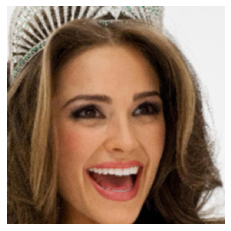

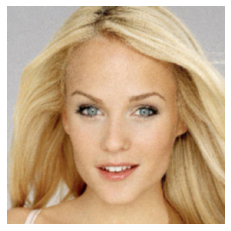

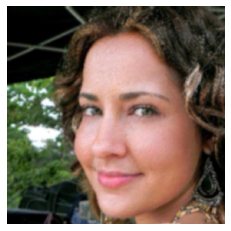

In [46]:
N_IMS = 3
out_dir = 'tmp'
fnames_small = []
for fname in sorted([f for f in os.listdir(config.DIR_CELEBA_IMS) if 'jpg' in f])[:N_IMS]:
    fname = oj(config.DIR_CELEBA_IMS, fname)
    im = mpimg.imread(fname)
    fnames_small.append(oj(out_dir, fname))
    plt.imsave(fnames_small[-1], cv2.resize(im[::4, ::4], dsize=(1024, 1024)))
#     util.imshow(im)
    util.imshow(cv2.resize(im[::4, ::4], dsize=(1024, 1024)))
    plt.show()

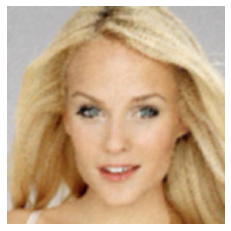

In [41]:
fname = oj(config.DIR_CELEBA_IMS, fname)
im = mpimg.imread(fname)
util.imshow(im)

In [ ]:
import gan_helper
GAN = gan_helper.Generator()
GAN.initialize_projector()

In [36]:
latents, im_rec = GAN.project(fnames_small[-1])
util.imshow(im_rec)

Loading images from "tmp/dataset/images"
Creating dataset "tmp/dataset/tfrecords"
Added 1 images.                         
Projecting image "00002.jpg"...
999 / 1000 ... 